In [1]:
#Importing librarys 
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')


In [2]:
#Read CSV file 
df = pd.read_csv('/kaggle/input/electric-vehicle-specifications-and-prices/EV_cars.csv')

Step 1: Understanding the Data 

* Dataframe shape
* head and tail
* dtypes
* describe

In [3]:
df.shape

(360, 9)

In [4]:
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [5]:
df.tail()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3
359,46.3,Fiat E-Ulysse L3 50 kWh,https://ev-database.org/car/1723/Fiat-E-Ulysse...,257,290.0,56990.0,180,130,12.1


In [6]:
df.dtypes

Battery                 float64
Car_name                 object
Car_name_link            object
Efficiency                int64
Fast_charge             float64
Price.DE.               float64
Range                     int64
Top_speed                 int64
acceleration..0.100.    float64
dtype: object

In [7]:
df.describe()

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
count,360.000000,360.000000,358.000000,309.000000,360.000000,360.000000,360.000000
mean,71.187500,195.175000,552.960894,67264.284790,369.694444,180.919444,7.288889
std,20.389849,31.909429,236.864801,34508.249544,107.315514,36.232023,3.005897
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,360.000000,45690.000000,295.000000,155.750000,4.900000
50%,71.000000,188.000000,520.000000,56942.000000,380.000000,180.000000,6.750000
75%,85.000000,208.250000,680.000000,73100.000000,446.250000,200.000000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,320.000000,19.100000



Step 2: Data Preperation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [8]:
df.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [9]:
df = df[['Battery', 
         'Car_name', 
         #'Car_name_link', 
         'Efficiency', 
         'Fast_charge',
         'Price.DE.', 
         'Range', 
         'Top_speed', 
         'acceleration..0.100.']]

In [10]:
# Rename the columns

df = df.rename(columns ={'acceleration..0.100.':' Acceleration_0_to_100'} )

In [11]:
df.head()

,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,Acceleration_0_to_100
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,55220.0,505,201,4.4


In [12]:
# Checking to see if this dataset has any null value

df.isna().sum()

Battery                    0
Car_name                   0
Efficiency                 0
Fast_charge                2
Price.DE.                 51
Range                      0
Top_speed                  0
 Acceleration_0_to_100     0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
355    False
356    False
357    False
358    False
359    False
Length: 360, dtype: bool

In [14]:
# Summary of the NULLL value 
df.isna().sum()

Battery                    0
Car_name                   0
Efficiency                 0
Fast_charge                2
Price.DE.                 51
Range                      0
Top_speed                  0
 Acceleration_0_to_100     0
dtype: int64

In [15]:
#Excluding the NULL and restting the data frame

df = df.loc[~df.isnull().any(axis=1)]\
        .reset_index(drop=True)\
        .copy()

In [16]:
# Check to see if there any duplicated records
df.duplicated().sum()

0

In [17]:
df.head()

,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,Acceleration_0_to_100
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,55220.0,505,201,4.4


Step 3: Feature Understanding

(Univariate analysis)

Plotting Feature Distribution
Histogram
KDE
Boxplot

Text(0.5, 0, 'Price.DE.')

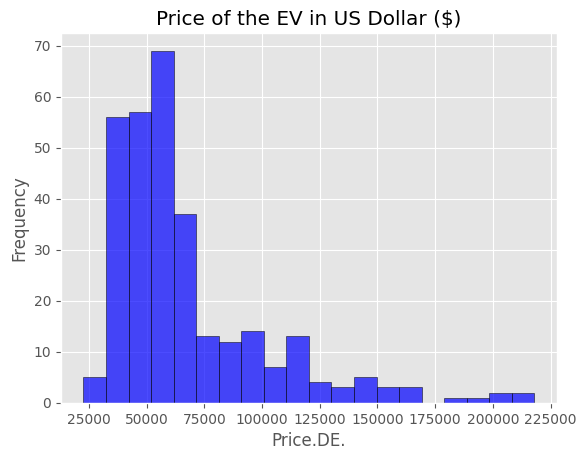

In [18]:
ax = df['Price.DE.']\
    .plot(kind='hist',
      bins = 20, 
      title = 'Price of the EV in US Dollar ($)',
      color = 'blue',
      edgecolor = 'black',
      alpha = 0.7)

ax.set_xlabel('Price.DE.')


Text(0.5, 0, 'Price.DE.')

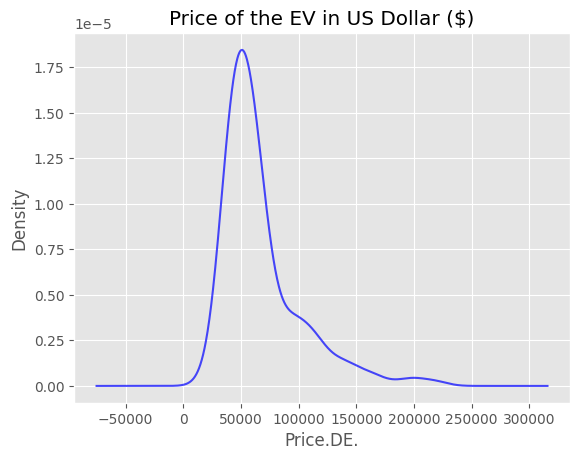

In [19]:
ax = df['Price.DE.']\
    .plot(kind='kde', 
     title = 'Price of the EV in US Dollar ($)',
      color = 'Blue',
       alpha = 0.7)

ax.set_xlabel('Price.DE.')

Step 4: Feature Relationships

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons

In [20]:
df

,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,Acceleration_0_to_100
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...
302,46.3,Citroen e-Jumpy Combi XL 50 kWh,257,290.0,52730.0,180,130,12.1
303,46.3,Fiat E-Ulysse L2 50 kWh,250,290.0,55990.0,185,130,12.1
304,46.3,Opel Vivaro-e Combi L 50 kWh,257,290.0,51825.0,180,130,12.1
305,68.0,Opel Zafira-e Life M 75 kWh,257,290.0,69250.0,265,130,13.3


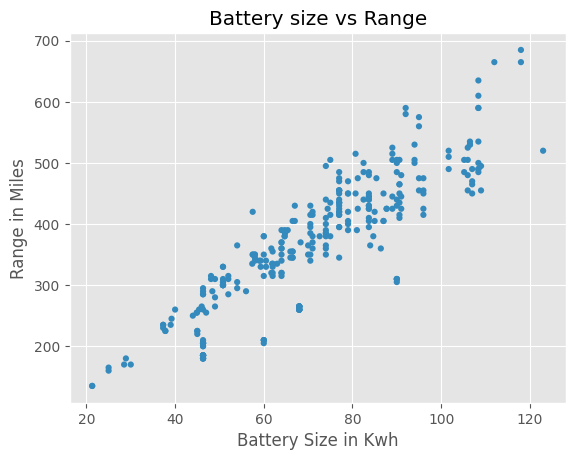

In [21]:
# Scatterplot using Matplotlib

ax = df.plot(kind = 'scatter',
       x='Battery',
       y= 'Range', 
       title = 'Battery size vs Range',
       edgecolor = 'none')

ax.set_xlabel ('Battery Size in Kwh')
ax.set_ylabel ('Range in Miles')



plt.show()

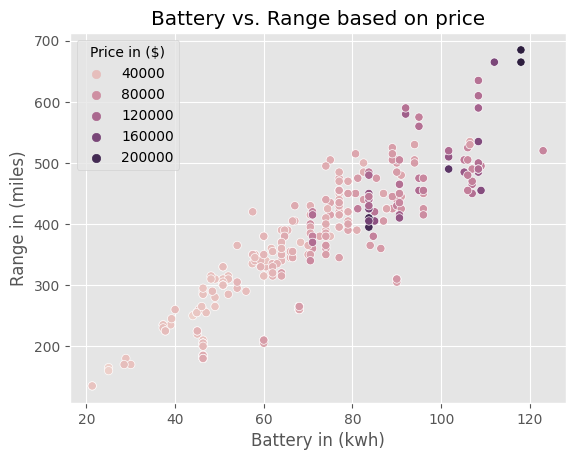

In [22]:
# Scatter plot with Seaborn 

sns.scatterplot(x='Battery',
                y= 'Range',
                hue = 'Price.DE.',
                data= df)

plt.title('Battery vs. Range based on price' )
plt.xlabel('Battery in (kwh)')
plt.ylabel('Range in (miles)')
plt.legend(title = 'Price in ($)')
plt.show()

In [23]:
df.columns

Index(['Battery', 'Car_name', 'Efficiency', 'Fast_charge', 'Price.DE.',
       'Range', 'Top_speed', ' Acceleration_0_to_100'],
      dtype='object')

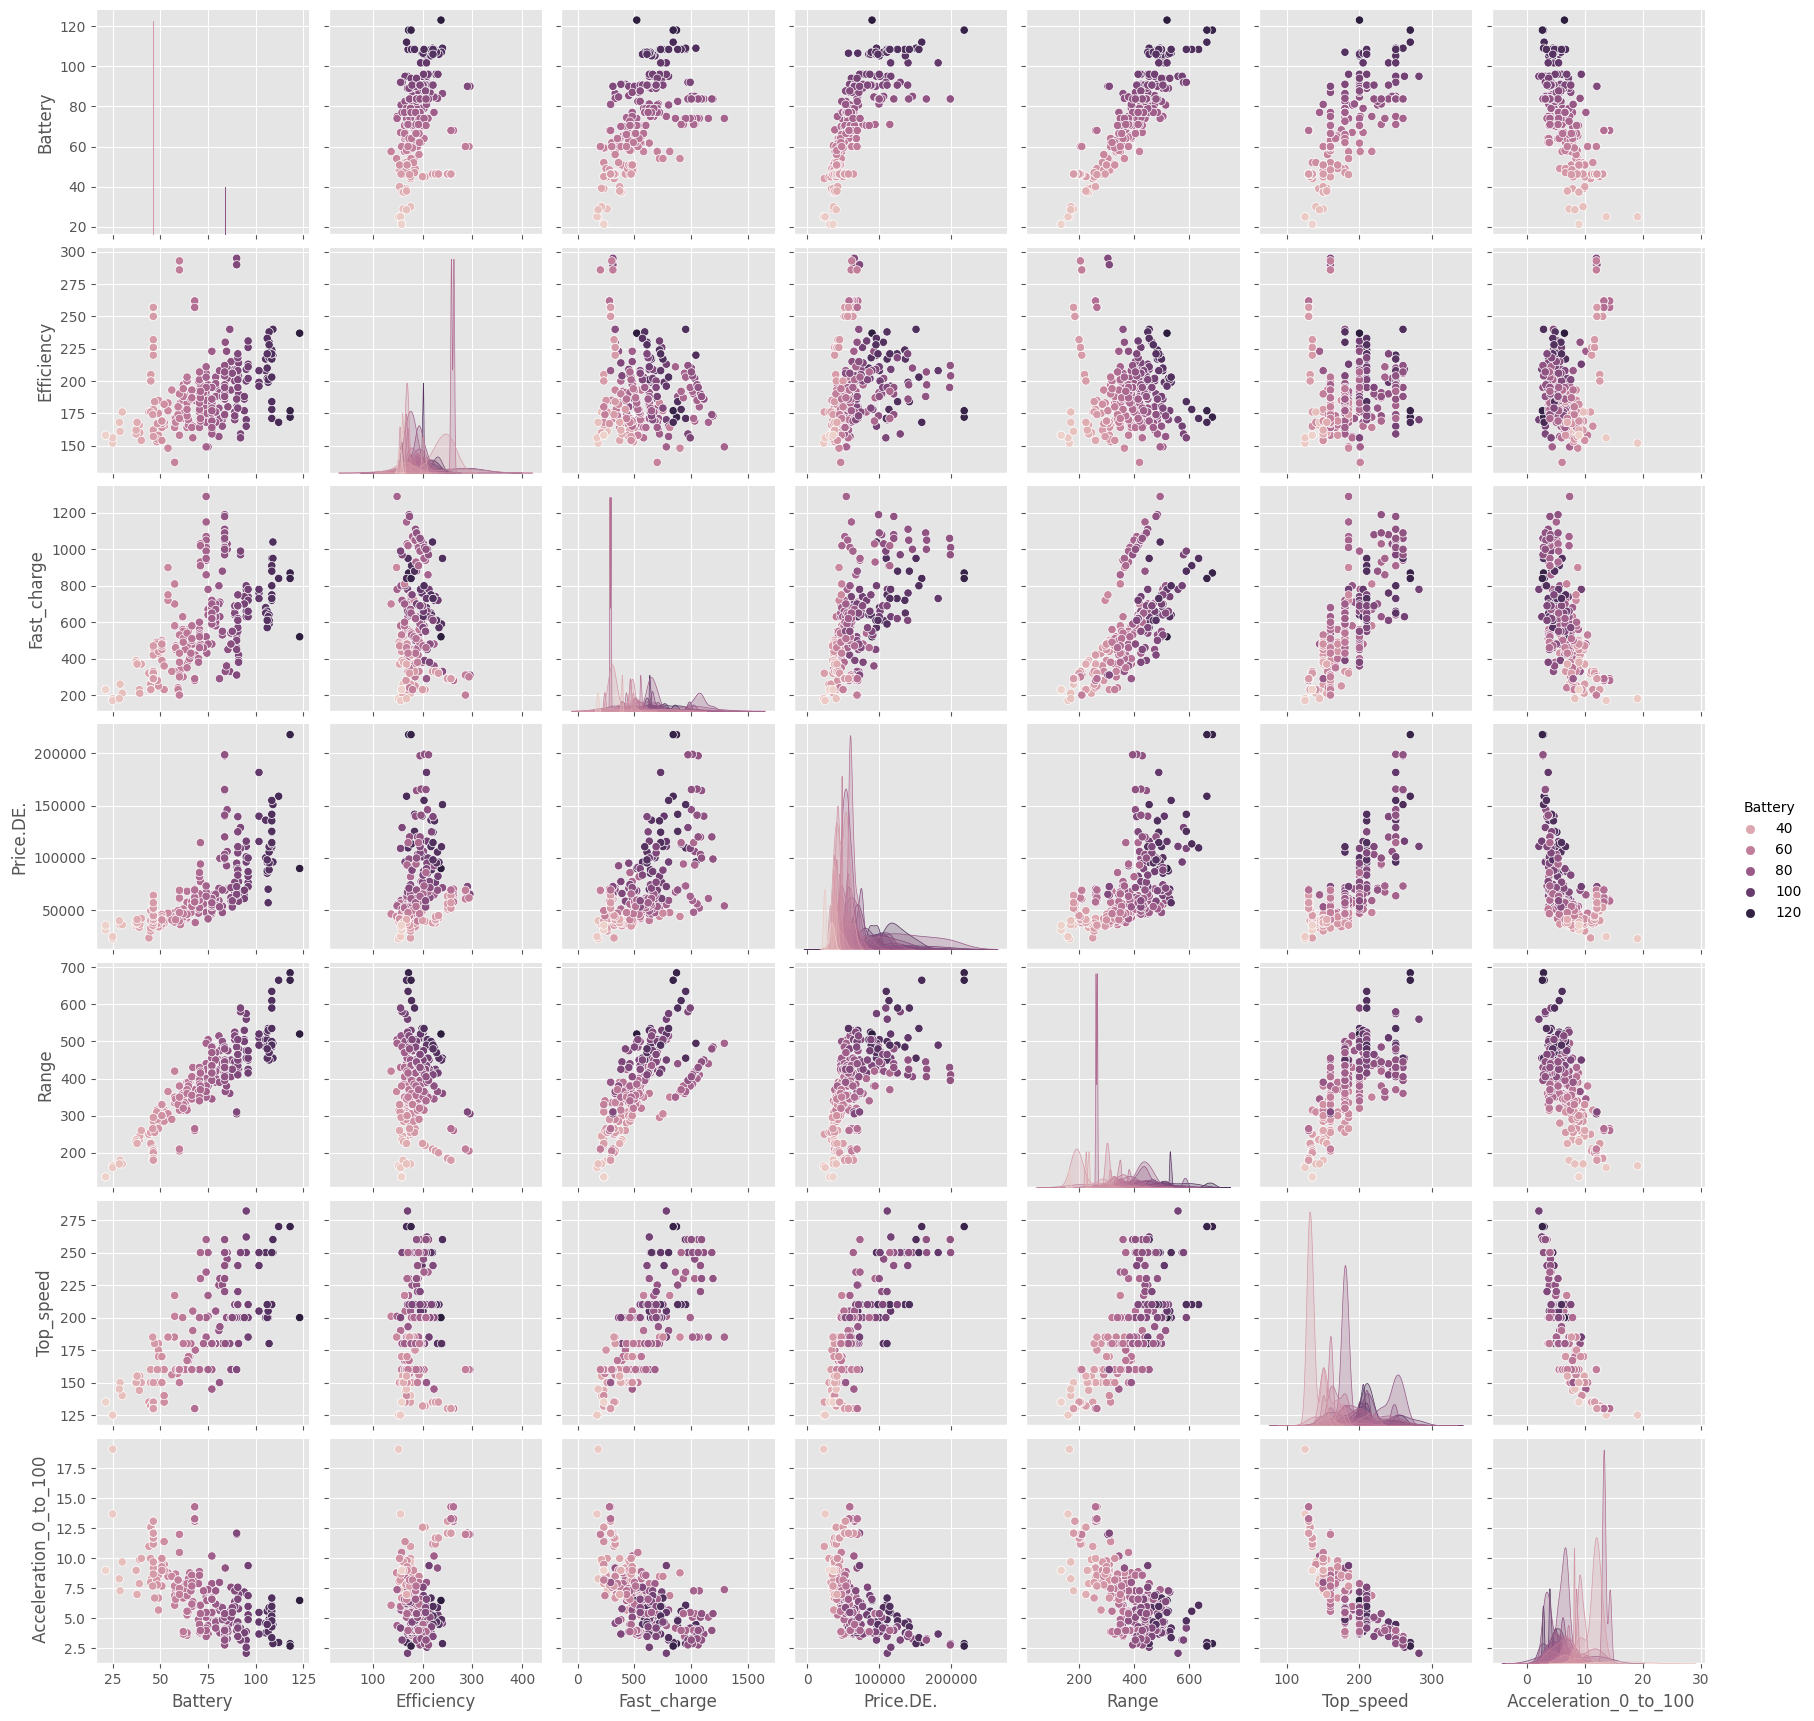

In [24]:
sns.pairplot(data = df, 
            vars= ['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.',
                   'Range', 'Top_speed', ' Acceleration_0_to_100'],
            hue = 'Battery')
plt.show()

In [25]:
# dropp NULL values and setting up a df_corr to see the correlation 
df_corr = df[ ['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.',
                   'Range', 'Top_speed', ' Acceleration_0_to_100']].dropna().corr()

<Axes: >

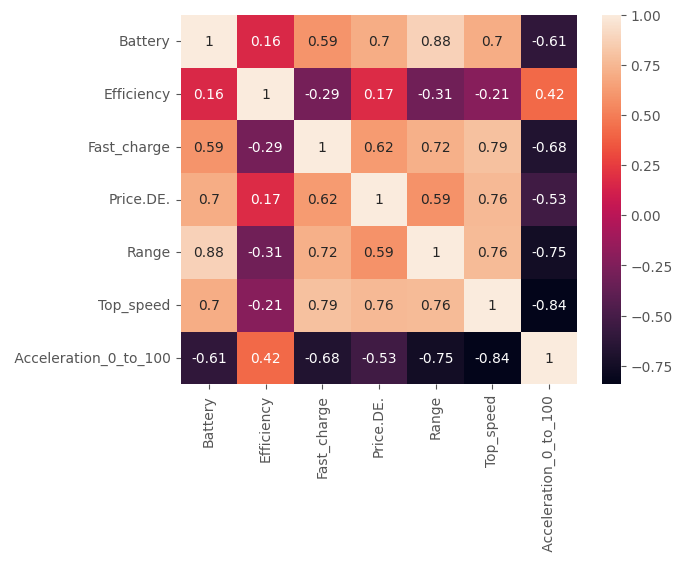

In [26]:
sns.heatmap(data = df_corr,
           annot = True)